## Project 8 - Introduction to Computer Vision - Plants Seedling Classification - Sai K (06/04/2023)

## Description

**Background and Context**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

**Objective**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

**Data Description**

This dataset contains images of unique plants belonging to 12 different species.
* The data file names are:
    *images.npy
    *Label.csv

* Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

* The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Plant species**

* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common Wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet

## Importing Libraries

In [1]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np # Importing numpy for Matrix Operations
import pandas as pd # Importing pandas to read CSV files
import matplotlib.pyplot as plt # Importting matplotlib for Plotting and visualizing images
import cv2  # Importing openCV for image processing
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os

# Importing all the required sub-modules from Keras
from tensorflow.keras.models import Sequential, Model # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D # Defining all the layers to build our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  #regularization method to prevent the overfitting
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator # Importing the ImageDataGenerator for data augmentation

from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

from cv2 import imshow as cv2_imshow # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
# Load the image file of the dataset
images = np.load('C:/Users/OneDrive/Desktop/Python/9_introduction_to_computer_vision/project/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('C:/Users/OneDrive/Desktop/Python/9_introduction_to_computer_vision/project/Labels.csv')

### Overview of the dataset

In [3]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [4]:
print(f"There are {labels.shape[0]} RGB images of shape 128 x 128 X 3, each image having RED, BLUE and Green channels")

There are 4750 RGB images of shape 128 x 128 X 3, each image having RED, BLUE and Green channels


**Unique labels**

In [5]:
unique_values = labels['Label'].unique()
print(unique_values)

['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


* There are 12 unique classes

**Proportion of each label**

In [6]:
proportions = labels['Label'].value_counts(normalize=True)
print(proportions)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64


In [7]:
label_counts = labels['Label'].value_counts()
print(label_counts)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


**Printing (1) image of each label**

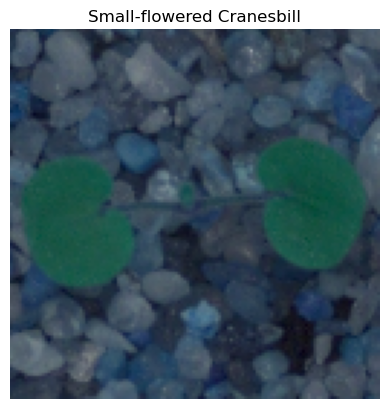

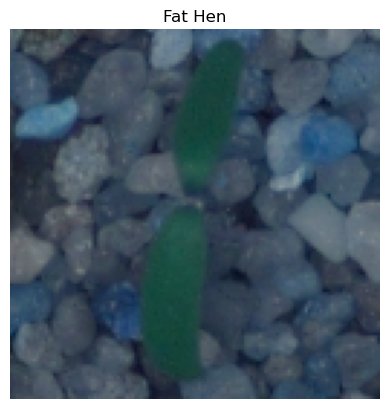

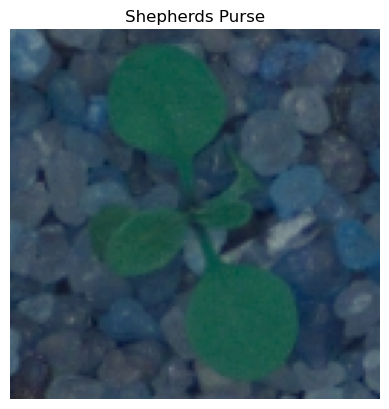

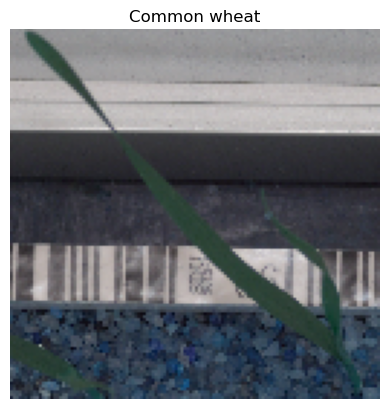

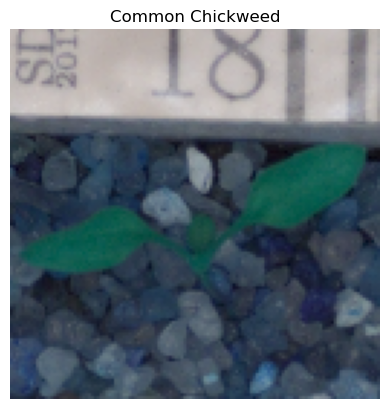

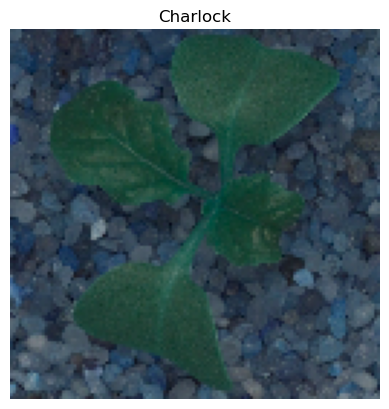

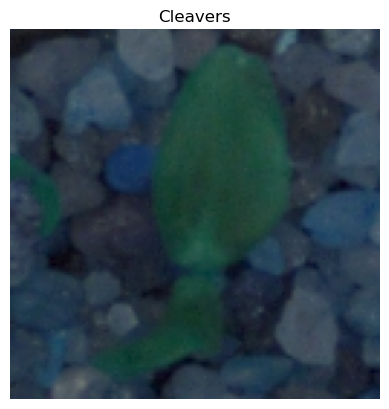

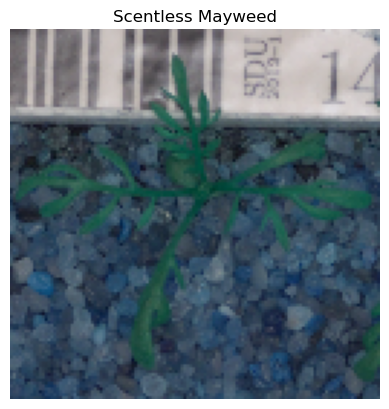

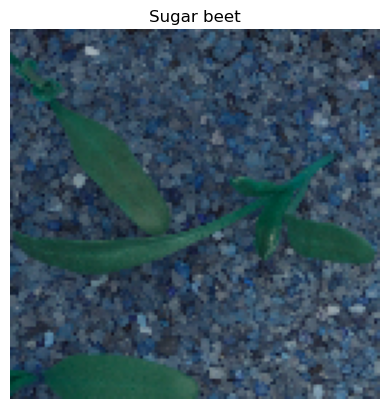

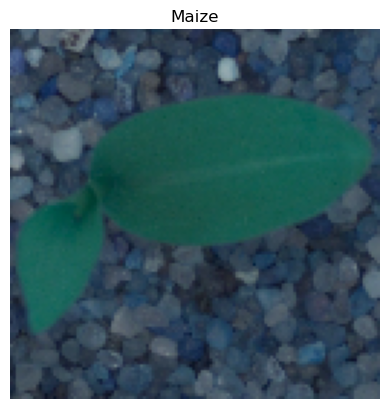

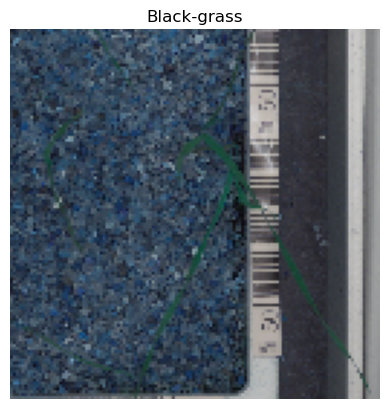

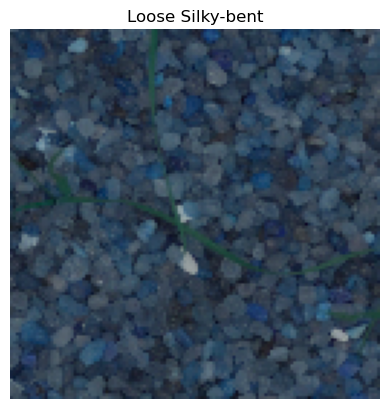

In [8]:
# Get the unique labels
unique_labels = labels['Label'].unique()

# Create a dictionary to store one image per unique label
image_dict = {}

# Iterate over each unique label
for label in unique_labels:
    # Find the index of the first occurrence of the label in the labels DataFrame
    index = labels.loc[labels['Label'] == label].index[0]
    # Get the corresponding image from the images array
    image = images[index]
    # Store the image in the dictionary with the label as the key
    image_dict[label] = image
    
# Display one image per unique label
for label, image in image_dict.items():
    plt.figure()
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

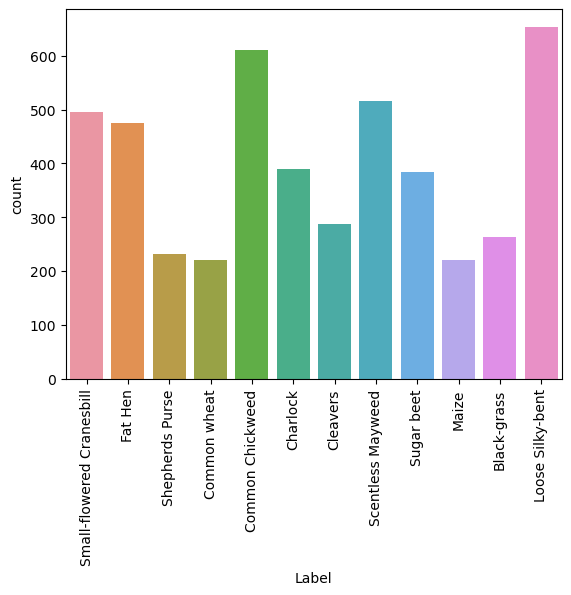

In [9]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

## Plotting images using OpenCV and matplotlib

In [10]:
cv2.imshow("Image 5", images[5]) #cv2.imshow is NOT compatible with jupiter notebook

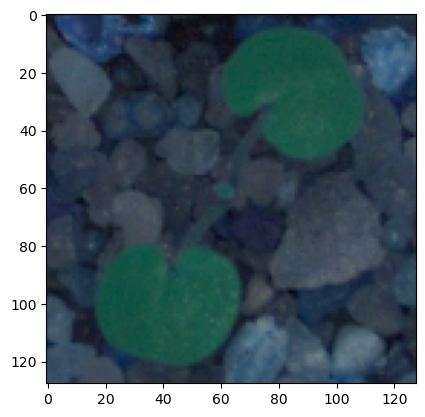

In [11]:
plt.imshow(images[5])

* The images are in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV. So we will convert these BGR images to RGB images so we could interpret them easily.

**Converting the images from BGR to RGB**

In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

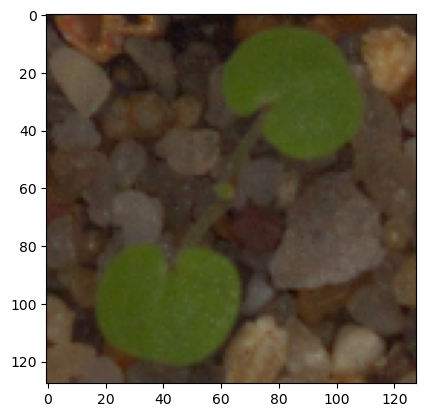

In [13]:
plt.imshow(images[5])

## Exploratory Data Analysis

In [14]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

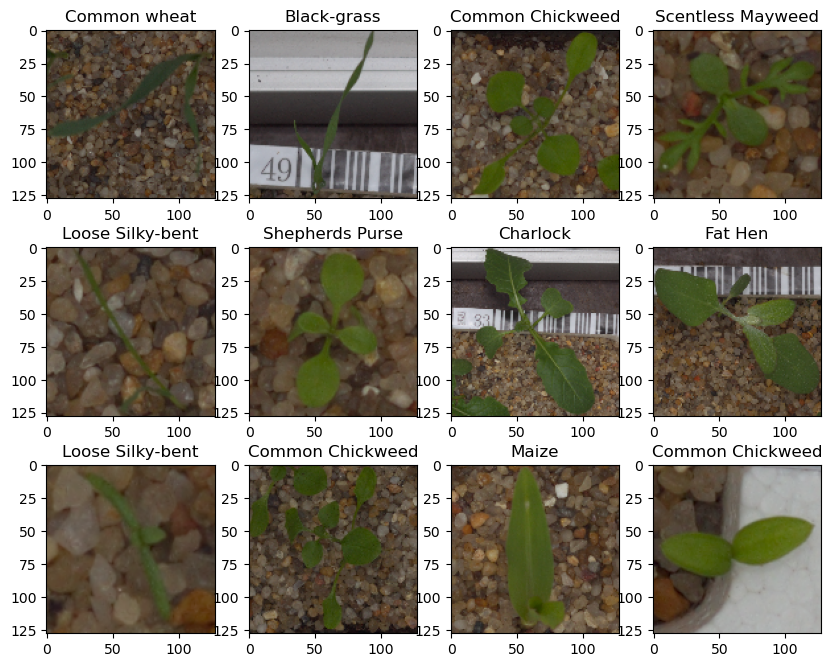

In [15]:
plot_images(images,labels)

**Infereces**

Based on the provided data, we can make the following inferences:

* The dataset contains 12 different plant species, with the corresponding number of instances (samples) for each species shown in the first column.

* The plant species with the highest number of instances is "Loose Silky-bent" with 530 samples, followed closely by "Common Chickweed" with 495 samples.

* The species with the lowest number of instances is "Common wheat" and "Maize," both with 179 samples.

* The distribution of instances among the different species shows some variation. The top three species ("Loose Silky-bent," "Common Chickweed," and "Scentless Mayweed") have a relatively higher number of instances compared to the others.

* The proportions of instances for each species, calculated by dividing the number of instances by the total number of instances, are shown in the second column.

* The species with the highest proportion is "Loose Silky-bent" with 13.78%, indicating it is the most prevalent species in the dataset.

* The species with the lowest proportion is "Common wheat" and "Maize," both with 4.65%.

* The proportions provide insights into the relative abundance of each species in the dataset, which can be useful for understanding class imbalances and potentially adjusting sampling strategies or model performance evaluation.

**Resizing images**

* As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [16]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

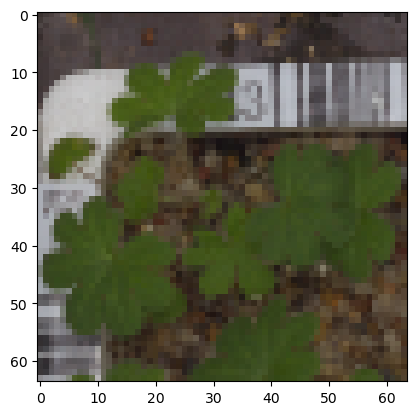

In [17]:
plt.imshow(images_decreased[3])

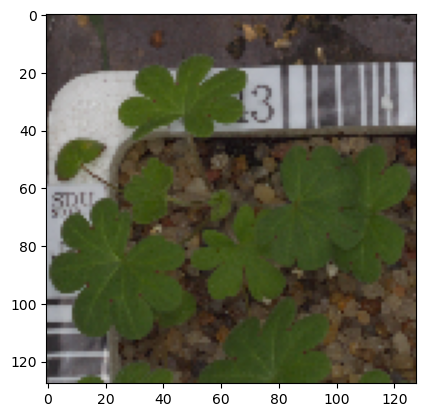

In [18]:
plt.imshow(images[3])

## Visualizing images using Gaussian Blur 

In [19]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


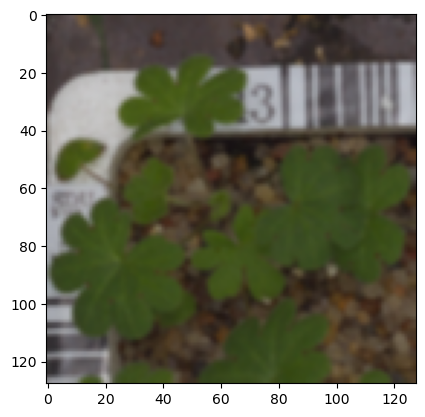

In [20]:
plt.imshow(images_gb[3])

## Splitting the dataset

In [21]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

**Shape of data set**

In [22]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


In [23]:
# Storing the value counts of target variable
count=y_train.Label.value_counts()
print(count)
print('*'*10)
count=y_train.Label.value_counts(normalize=True)
print(count)

Loose Silky-bent             530
Common Chickweed             495
Scentless Mayweed            418
Small-flowered Cranesbill    402
Fat Hen                      384
Charlock                     316
Sugar beet                   312
Cleavers                     232
Black-grass                  213
Shepherds Purse              187
Maize                        179
Common wheat                 179
Name: Label, dtype: int64
**********
Loose Silky-bent             0.137770
Common Chickweed             0.128672
Scentless Mayweed            0.108656
Small-flowered Cranesbill    0.104497
Fat Hen                      0.099818
Charlock                     0.082142
Sugar beet                   0.081102
Cleavers                     0.060307
Black-grass                  0.055368
Shepherds Purse              0.048609
Maize                        0.046530
Common wheat                 0.046530
Name: Label, dtype: float64


## Encoding the target labels

In [24]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

**Shape of Labels columns**

In [25]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


## Data Normalization

In [26]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model #1 - Convolutional Neural Network (CNN)

In [27]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [28]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model_1.add(Dense(16, activation='relu'))
model_1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model_1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [30]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 8s - loss: 2.4660 - accuracy: 0.1256 - val_loss: 2.4490 - val_accuracy: 0.1285 - 8s/epoch - 63ms/step
Epoch 2/30
121/121 - 7s - loss: 2.4156 - accuracy: 0.1378 - val_loss: 2.3960 - val_accuracy: 0.2056 - 7s/epoch - 61ms/step
Epoch 3/30
121/121 - 7s - loss: 2.3676 - accuracy: 0.1638 - val_loss: 2.3415 - val_accuracy: 0.2196 - 7s/epoch - 60ms/step
Epoch 4/30
121/121 - 7s - loss: 2.3285 - accuracy: 0.1809 - val_loss: 2.2783 - val_accuracy: 0.2266 - 7s/epoch - 60ms/step
Epoch 5/30
121/121 - 7s - loss: 2.2843 - accuracy: 0.1999 - val_loss: 2.2354 - val_accuracy: 0.2407 - 7s/epoch - 60ms/step
Epoch 6/30
121/121 - 7s - loss: 2.2760 - accuracy: 0.1960 - val_loss: 2.2330 - val_accuracy: 0.2570 - 7s/epoch - 60ms/step
Epoch 7/30
121/121 - 7s - loss: 2.2458 - accuracy: 0.2103 - val_loss: 2.1950 - val_accuracy: 0.2570 - 7s/epoch - 60ms/step
Epoch 8/30
121/121 - 7s - loss: 2.2349 - accuracy: 0.2126 - val_loss: 2.2286 - val_accuracy: 0.2593 - 7s/epoch - 61ms/step
Epoch 9/30
121/1

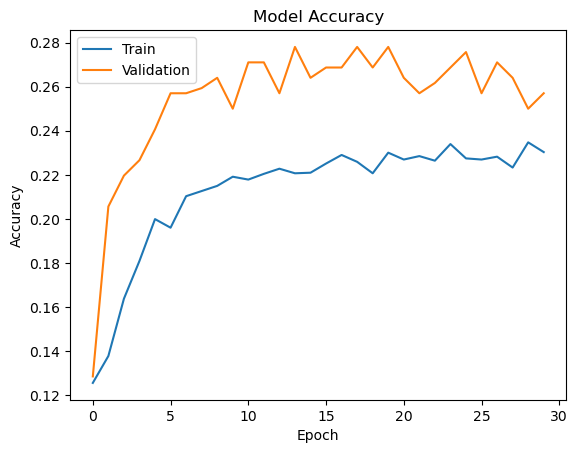

In [31]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
accuracy_1 = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.9863 - accuracy: 0.2632 - 269ms/epoch - 18ms/step


In [33]:
# Here we would get the output as probablities for each category
y_pred_1=model_1.predict(X_test_normalized)

15/15 [==============================] - 0s 17ms/step


In [34]:
y_pred_1

array([[2.3260586e-02, 1.1171165e-01, 7.4227147e-02, ..., 6.7504227e-02,
        1.2591405e-01, 6.8011813e-02],
       [2.3260586e-02, 1.1171165e-01, 7.4227147e-02, ..., 6.7504227e-02,
        1.2591405e-01, 6.8011813e-02],
       [2.3260586e-02, 1.1171165e-01, 7.4227147e-02, ..., 6.7504227e-02,
        1.2591405e-01, 6.8011813e-02],
       ...,
       [1.8978849e-01, 5.9584540e-06, 2.7143213e-03, ..., 2.7593931e-08,
        4.7076335e-03, 8.2636498e-02],
       [2.3260586e-02, 1.1171165e-01, 7.4227147e-02, ..., 6.7504227e-02,
        1.2591405e-01, 6.8011813e-02],
       [2.3260586e-02, 1.1171165e-01, 7.4227147e-02, ..., 6.7504227e-02,
        1.2591405e-01, 6.8011813e-02]], dtype=float32)

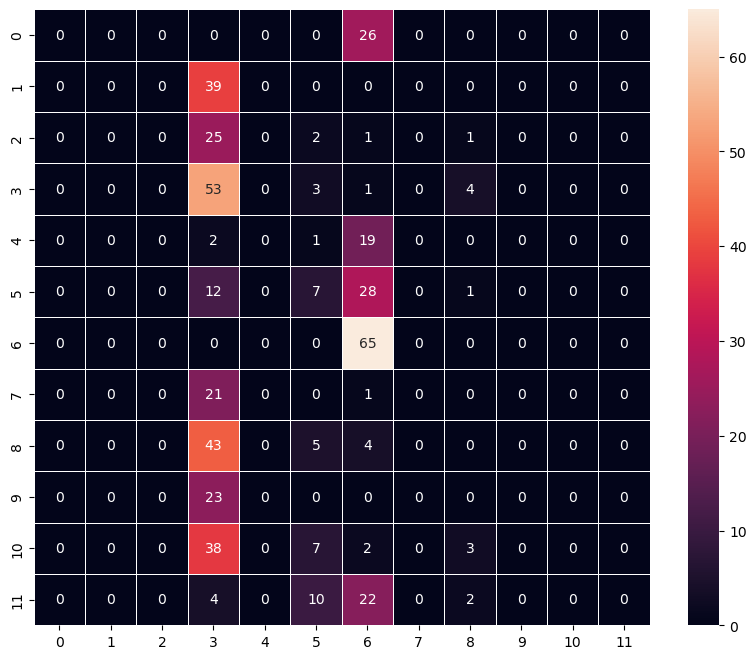

In [35]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_1=np.argmax(y_pred_1,axis=1)
y_test_arg_1=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_1,y_pred_arg_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [36]:
#Accuracy as per the classification report 
from sklearn import metrics
cr1=metrics.classification_report(y_test_arg_1,y_pred_arg_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        29
           3       0.20      0.87      0.33        61
           4       0.00      0.00      0.00        22
           5       0.20      0.15      0.17        48
           6       0.38      1.00      0.56        65
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00        38

    accuracy                           0.26       475
   macro avg       0.07      0.17      0.09       475
weighted avg       0.10      0.26      0.14       475



## Model #2 - Convolutional Neural Network (CNN) with early stopping

In [37]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [38]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [39]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model_2.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model_2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history_2=model_2.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
108/109 [============================>.] - ETA: 0s - loss: 2.4303 - accuracy: 0.1345
Epoch 1: val_accuracy improved from -inf to 0.14026, saving model to best_model.h5
109/109 [==============================] - 9s 81ms/step - loss: 2.4299 - accuracy: 0.1346 - val_loss: 2.4678 - val_accuracy: 0.1403
Epoch 2/30
108/109 [============================>.] - ETA: 0s - loss: 2.4114 - accuracy: 0.1522
Epoch 2: val_accuracy improved from 0.14026 to 0.17143, saving model to best_model.h5
109/109 [==============================] - 9s 83ms/step - loss: 2.4113 - accuracy: 0.1519 - val_loss: 2.4082 - val_accuracy: 0.1714
Epoch 3/30
108/109 [============================>.] - ETA: 0s - loss: 2.2758 - accuracy: 0.2260
Epoch 3: val_accuracy improved from 0.17143 to 0.24416, saving model to best_model.h5
109/109 [==============================] - 9s 83ms/step - loss: 2.2756 - accuracy: 0.2256 - val_loss: 2.1355 - val_accuracy: 0.2442
Epoch 4/30
108/109 [============================>.] - ETA: 0s

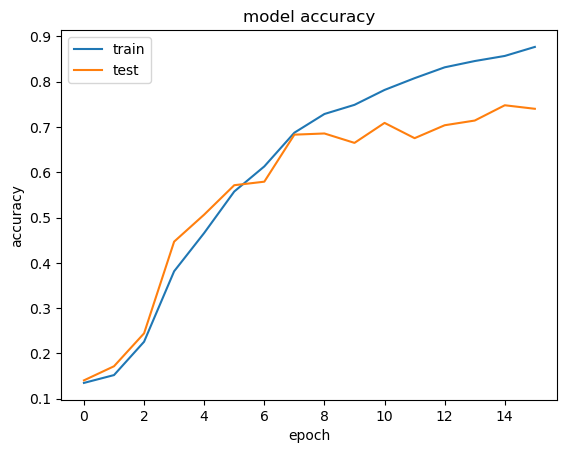

In [41]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
accuracy_2 = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8779 - accuracy: 0.7368 - 297ms/epoch - 20ms/step


In [43]:
# Here we would get the output as probablities for each category
y_pred_2=model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 20ms/step


In [44]:
y_pred_2

array([[5.81427706e-09, 1.54598745e-09, 5.01967349e-07, ...,
        1.18771546e-04, 6.26432239e-10, 1.29419903e-04],
       [4.07392089e-12, 1.18166150e-03, 3.39441234e-03, ...,
        4.00655244e-06, 9.95419979e-01, 2.10425011e-09],
       [1.35660838e-09, 1.04944263e-06, 3.08414656e-07, ...,
        7.72252024e-05, 9.99919534e-01, 6.86748969e-09],
       ...,
       [2.38675103e-01, 1.77505314e-07, 2.47957104e-07, ...,
        3.32698551e-06, 2.90301081e-08, 4.29012243e-06],
       [9.32942523e-09, 5.30350053e-06, 2.38657981e-06, ...,
        1.55110266e-02, 1.76222716e-08, 3.13671881e-05],
       [2.70528034e-07, 1.12737973e-06, 2.37732749e-07, ...,
        8.96983221e-02, 5.08282892e-06, 5.26651866e-06]], dtype=float32)

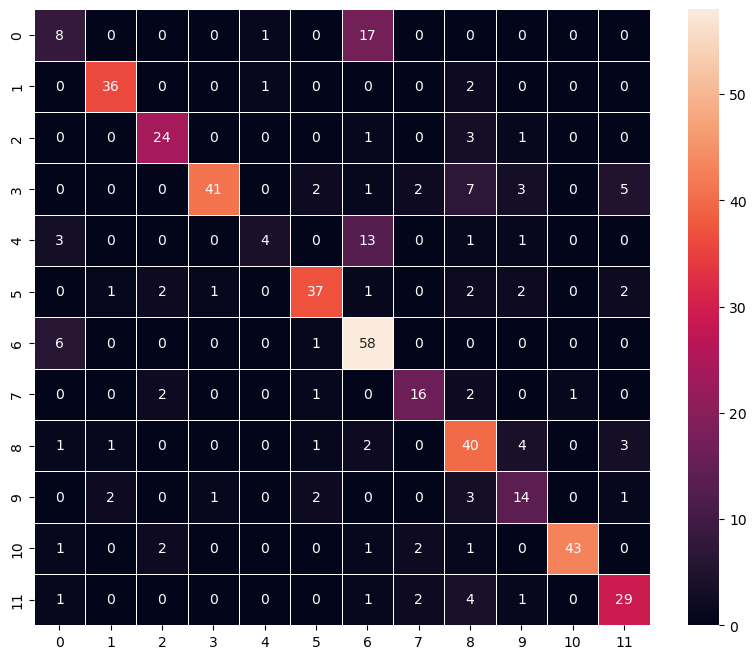

In [45]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_2=np.argmax(y_pred_2,axis=1)
y_test_arg_2=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_2,y_pred_arg_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [46]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test_arg_2,y_pred_arg_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        26
           1       0.90      0.92      0.91        39
           2       0.80      0.83      0.81        29
           3       0.95      0.67      0.79        61
           4       0.67      0.18      0.29        22
           5       0.84      0.77      0.80        48
           6       0.61      0.89      0.72        65
           7       0.73      0.73      0.73        22
           8       0.62      0.77      0.68        52
           9       0.54      0.61      0.57        23
          10       0.98      0.86      0.91        50
          11       0.72      0.76      0.74        38

    accuracy                           0.74       475
   macro avg       0.73      0.69      0.69       475
weighted avg       0.75      0.74      0.73       475



## Model #3 - Convolutional Neural Network (CNN) with Data Augemtation

In [47]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [48]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [49]:
# Intializing a sequential model
model_3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model_3.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model_3.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Epochs
epochs = 30
# Batch size
batch_size = 32

history_3 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    callbacks=[es, mc],
                    verbose=1)

Epoch 1/30
120/120 [==============================] - ETA: 0s - loss: 2.4277 - accuracy: 0.1363
Epoch 1: val_accuracy improved from -inf to 0.13785, saving model to best_model.h5
120/120 [==============================] - 9s 76ms/step - loss: 2.4277 - accuracy: 0.1363 - val_loss: 2.4303 - val_accuracy: 0.1379
Epoch 2/30
120/120 [==============================] - ETA: 0s - loss: 2.2745 - accuracy: 0.2202
Epoch 2: val_accuracy improved from 0.13785 to 0.36682, saving model to best_model.h5
120/120 [==============================] - 10s 80ms/step - loss: 2.2745 - accuracy: 0.2202 - val_loss: 1.8288 - val_accuracy: 0.3668
Epoch 3/30
120/120 [==============================] - ETA: 0s - loss: 1.6910 - accuracy: 0.4079
Epoch 3: val_accuracy did not improve from 0.36682
120/120 [==============================] - 9s 79ms/step - loss: 1.6910 - accuracy: 0.4079 - val_loss: 1.8808 - val_accuracy: 0.3575
Epoch 4/30
120/120 [==============================] - ETA: 0s - loss: 1.4365 - accuracy: 0.4852

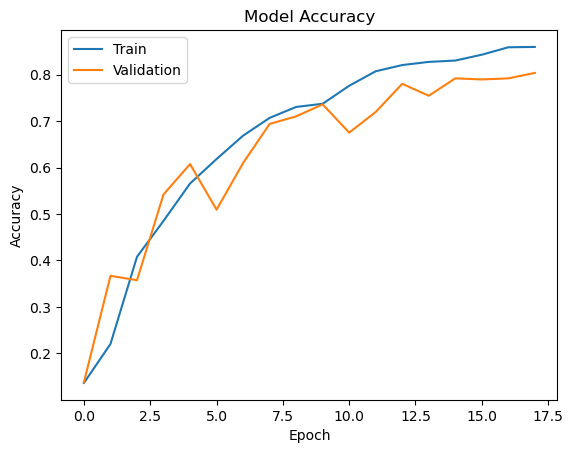

In [51]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
accuracy_3 = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6739 - accuracy: 0.8147 - 331ms/epoch - 22ms/step


In [53]:
# Here we would get the output as probablities for each category
y_pred_3=model_3.predict(X_test_normalized)

15/15 [==============================] - 0s 20ms/step


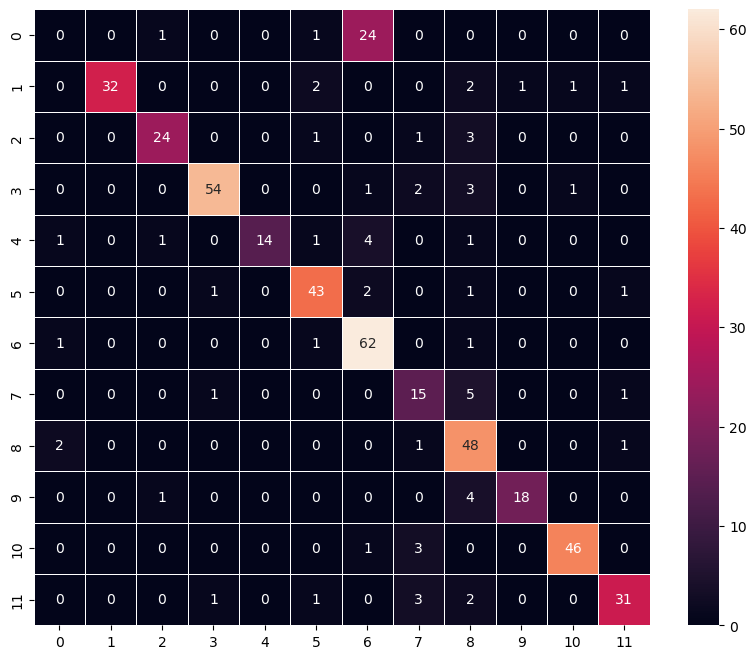

In [54]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_3=np.argmax(y_pred_3,axis=1)
y_test_arg_3=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_3,y_pred_arg_3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [55]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test_arg_3,y_pred_arg_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       1.00      0.82      0.90        39
           2       0.89      0.83      0.86        29
           3       0.95      0.89      0.92        61
           4       1.00      0.64      0.78        22
           5       0.86      0.90      0.88        48
           6       0.66      0.95      0.78        65
           7       0.60      0.68      0.64        22
           8       0.69      0.92      0.79        52
           9       0.95      0.78      0.86        23
          10       0.96      0.92      0.94        50
          11       0.89      0.82      0.85        38

    accuracy                           0.81       475
   macro avg       0.79      0.76      0.76       475
weighted avg       0.80      0.81      0.80       475



## Model #4 - Convolutional Neural Network (CNN) with Data Augemtation

In [56]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [57]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [58]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [59]:
# Create a sequential model
model_4 = Sequential()

# Add a convolutional layer with 64 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(64, 64, 3), activation='relu'))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add another convolutional layer with 64 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))

# Add a max pooling layer with pool size 2x2
model_4.add(MaxPooling2D((2, 2)))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add a dropout layer with rate 0.1
model_4.add(Dropout(0.1))

# Add a convolutional layer with 128 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add another convolutional layer with 128 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# Add a max pooling layer with pool size 2x2
model_4.add(MaxPooling2D((2, 2)))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add a dropout layer with rate 0.1
model_4.add(Dropout(0.1))

# Add a convolutional layer with 256 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add another convolutional layer with 256 filters, kernel size 5x5, and ReLU activation
model_4.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))

# Add a max pooling layer with pool size 2x2
model_4.add(MaxPooling2D((2, 2)))

# Add a batch normalization layer
model_4.add(BatchNormalization(axis=3))

# Add a dropout layer with rate 0.1
model_4.add(Dropout(0.1))

# Flatten the output of the convolutional layers
model_4.add(Flatten())

# Add a dense layer with 256 neurons and ReLU activation
model_4.add(Dense(256, activation='relu'))

# Add a batch normalization layer
model_4.add(BatchNormalization())

# Add a dropout layer with rate 0.5
model_4.add(Dropout(0.5))

# Add a dense layer with 256 neurons and ReLU activation
model_4.add(Dense(256, activation='relu'))

# Add a batch normalization layer
model_4.add(BatchNormalization())

# Add a dropout layer with rate 0.5
model_4.add(Dropout(0.5))

# Add a dense layer with 12 output neurons and softmax activation
model_4.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Summarize the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                        

In [60]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Epochs
epochs = 30
# Batch size
batch_size = 32

history_4 = model_4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    callbacks=[es, mc],
                    verbose=1)

Epoch 1/30
120/120 [==============================] - ETA: 0s - loss: 2.8158 - accuracy: 0.2047
Epoch 1: val_accuracy improved from -inf to 0.06542, saving model to best_model.h5
120/120 [==============================] - 68s 559ms/step - loss: 2.8158 - accuracy: 0.2047 - val_loss: 8.4168 - val_accuracy: 0.0654
Epoch 2/30
120/120 [==============================] - ETA: 0s - loss: 1.9819 - accuracy: 0.3649
Epoch 2: val_accuracy improved from 0.06542 to 0.26402, saving model to best_model.h5
120/120 [==============================] - 67s 562ms/step - loss: 1.9819 - accuracy: 0.3649 - val_loss: 3.1044 - val_accuracy: 0.2640
Epoch 3/30
120/120 [==============================] - ETA: 0s - loss: 1.6698 - accuracy: 0.4495
Epoch 3: val_accuracy did not improve from 0.26402
120/120 [==============================] - 67s 560ms/step - loss: 1.6698 - accuracy: 0.4495 - val_loss: 4.4663 - val_accuracy: 0.0981
Epoch 4/30
120/120 [==============================] - ETA: 0s - loss: 1.4175 - accuracy: 0

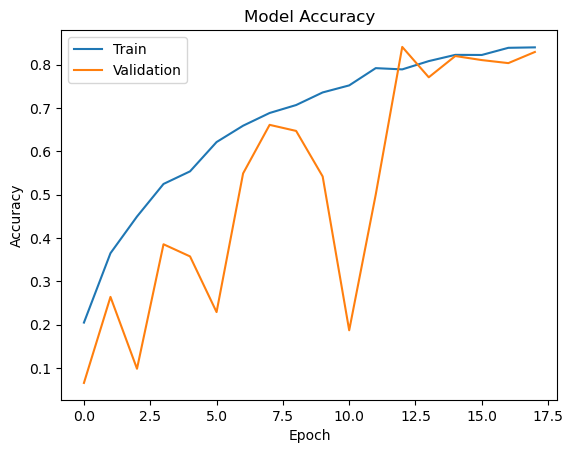

In [61]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
accuracy_4 = model_4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.7164 - accuracy: 0.7895 - 1s/epoch - 96ms/step


In [63]:
# Here we would get the output as probablities for each category
y_pred_4=model_4.predict(X_test_normalized)

15/15 [==============================] - 2s 97ms/step


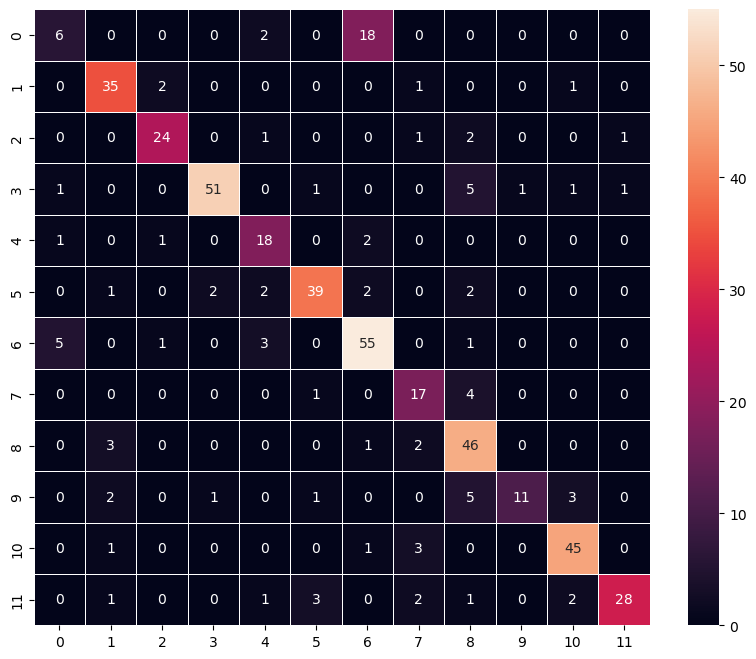

In [64]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_4=np.argmax(y_pred_4,axis=1)
y_test_arg_4=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_4,y_pred_arg_4)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [65]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test_arg_4,y_pred_arg_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.46      0.23      0.31        26
           1       0.81      0.90      0.85        39
           2       0.86      0.83      0.84        29
           3       0.94      0.84      0.89        61
           4       0.67      0.82      0.73        22
           5       0.87      0.81      0.84        48
           6       0.70      0.85      0.76        65
           7       0.65      0.77      0.71        22
           8       0.70      0.88      0.78        52
           9       0.92      0.48      0.63        23
          10       0.87      0.90      0.88        50
          11       0.93      0.74      0.82        38

    accuracy                           0.79       475
   macro avg       0.78      0.75      0.75       475
weighted avg       0.80      0.79      0.78       475



## Model #5 Transfer Learning using VGG16 and dat augmentation

In [66]:
# Loading VGG16 model 
model = VGG16(weights='imagenet')
# Summary of the whole model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

* Training 138,357,544 parameters for 30 epochs will be computationally expensive. So limiting the VGG16 Model to Block 5

In [67]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [68]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [69]:
model_5 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_5.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_5.add(Flatten())

# Adding a dense output layer
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                65568     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Epochs
epochs = 30
# Batch size
batch_size = 32

history_vgg16 = model_5.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    callbacks=[es, mc],
                    verbose=1)

Epoch 1/30
120/120 [==============================] - ETA: 0s - loss: 2.2607 - accuracy: 0.2152
Epoch 1: val_accuracy improved from -inf to 0.32944, saving model to best_model.h5
120/120 [==============================] - 24s 196ms/step - loss: 2.2607 - accuracy: 0.2152 - val_loss: 2.0470 - val_accuracy: 0.3294
Epoch 2/30
120/120 [==============================] - ETA: 0s - loss: 1.9078 - accuracy: 0.3421
Epoch 2: val_accuracy improved from 0.32944 to 0.39252, saving model to best_model.h5
120/120 [==============================] - 24s 197ms/step - loss: 1.9078 - accuracy: 0.3421 - val_loss: 1.8001 - val_accuracy: 0.3925
Epoch 3/30
120/120 [==============================] - ETA: 0s - loss: 1.6986 - accuracy: 0.4024
Epoch 3: val_accuracy improved from 0.39252 to 0.41822, saving model to best_model.h5
120/120 [==============================] - 23s 190ms/step - loss: 1.6986 - accuracy: 0.4024 - val_loss: 1.6570 - val_accuracy: 0.4182
Epoch 4/30
120/120 [==============================] - E

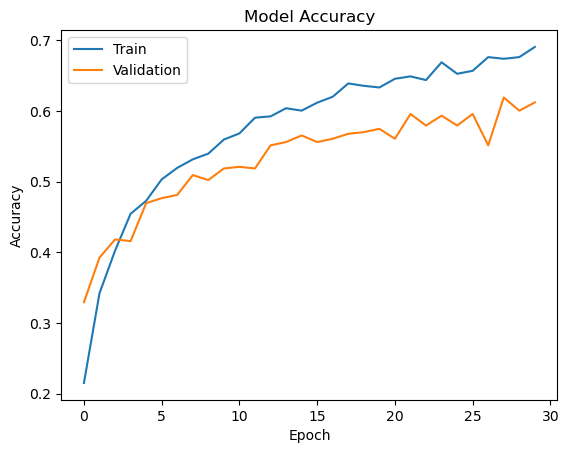

In [71]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [72]:
accuracy_5 = model_5.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 1.1758 - accuracy: 0.6063 - 2s/epoch - 151ms/step


In [73]:
# Here we would get the output as probablities for each category
y_pred_5=model_5.predict(X_test_normalized)

15/15 [==============================] - 2s 151ms/step


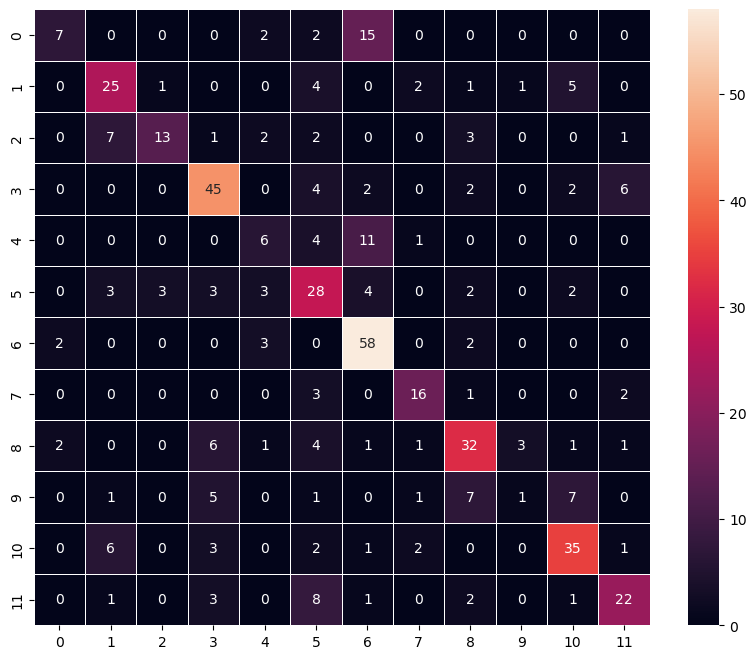

In [74]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_5=np.argmax(y_pred_5,axis=1)
y_test_arg_5=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_5,y_pred_arg_5)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [75]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test_arg_5,y_pred_arg_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.64      0.27      0.38        26
           1       0.58      0.64      0.61        39
           2       0.76      0.45      0.57        29
           3       0.68      0.74      0.71        61
           4       0.35      0.27      0.31        22
           5       0.45      0.58      0.51        48
           6       0.62      0.89      0.73        65
           7       0.70      0.73      0.71        22
           8       0.62      0.62      0.62        52
           9       0.20      0.04      0.07        23
          10       0.66      0.70      0.68        50
          11       0.67      0.58      0.62        38

    accuracy                           0.61       475
   macro avg       0.58      0.54      0.54       475
weighted avg       0.60      0.61      0.59       475



## Visualizing the prediction 

* Visualizing with With Model #3 as it has the better accuracy than the rest

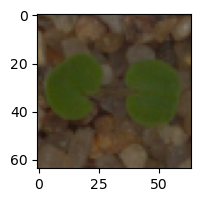

1/1 [==============================] - 0s 30ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


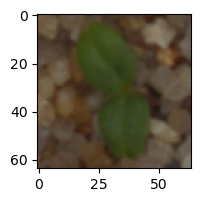

1/1 [==============================] - 0s 12ms/step
Predicted Label ['Cleavers']
True Label Cleavers


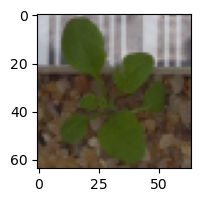

1/1 [==============================] - 0s 38ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [76]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Conclusion

**CNN Model #1:**

* Train Accuracy: 23%
* Validation Accuracy: 26%
* Test Accuracy: 26%
* Trainable parameters: 151,548
* Optimizer: Adam
* This model has low accuracy on both the training and validation sets, indicating poor performance. It has a relatively small number of trainable parameters and uses the Adam optimizer.

**CNN Model #2 with early stopping:**

* Train Accuracy: 88%
* Validation Accuracy: 74%
* Test Accuracy: 74%
* Trainable parameters: 235,616
* Optimizer: SGD
* This model shows significant improvement compared to Model #1. It achieves higher accuracy on both the training and validation sets, indicating better performance. The use of early stopping likely helped prevent overfitting. It has a moderate number of trainable parameters and uses the SGD optimizer.

**CNN Model #3 with data augmentation:**

* Train Accuracy: 86%
* Validation Accuracy: 80%
* Test Accuracy: 81%
* Trainable parameters: 235,616
* Optimizer: SGD
* This model performs slightly better than Model #2, with increased accuracy on the training, validation, and test sets. The use of data augmentation might have helped improve generalization by providing more diverse training samples. It has the same number of trainable parameters as Model #2 and uses the SGD optimizer.

* CNN Model #2 w/ early stopping achieved the highest train accuracy, but its validation and test accuracies were lower than those of CNN Model #3 w/ data augmentation. This suggests that CNN Model #2 may have been overfitting the training data.

* CNN Model #3 w/ data augmentation achieved the highest validation and test accuracies, even though its train accuracy was lower than that of CNN Model #2 w/ early stopping. This suggests that CNN Model #3 was able to generalize better to unseen data than CNN Model #2.


**CNN Model #4 with data augmentation:**

* Train Accuracy: 84%
* Validation Accuracy: 63%
* Test Accuracy: 79%
* Trainable parameters: 3,317,580
* Optimizer: SGD
* This model achieves high accuracy on the training set but performs relatively poorly on the validation set. It has a large number of trainable parameters, which may have led to overfitting. However, it shows improved performance on the test set. It uses the SGD optimizer.

* This model aslo achieved similar validation and test accuracies to CNN Model #3 w/ data augmentation. This suggests that data augmentation was an effective way to improve the generalization performance of the model.

**VGG16 Transfer Learning Model:**

* Train Accuracy: 69%
* Validation Accuracy: 61%
* Test Accuracy: 60%
* Trainable parameters: 14,714,688
* Optimizer: SGD
* This model performs moderately with lower accuracy on both the training and validation sets compared to the previous models. Despite having a large number of trainable parameters, it does not achieve high accuracy. It uses the SGD optimizer.

* VGG16 Transfer Learning Model achieved the lowest test accuracy, but it had the fewest trainable parameters. This suggests that VGG16 Transfer Learning Model may not be as effective as a CNN model with a similar number of trainable parameters that is trained from scratch.

**Overall** 
* Model #3 with data augmentation appears to be the most effective among the provided models, achieving better accuracy and generalization. Model #2 with early stopping also performs well. Models #1 and #5 show lower accuracy, and Model #4 shows signs of overfitting due to the large number of trainable parameters.

In [77]:
pd.DataFrame({'Models':['CNN Model #1','CNN Model #2 w/ early stopping','CNN Model #3 w/ data augmentation','CNN Model #4 w/ data augmentation','VGG16 Transfer Learning Model'],'Train Accuracy':['23%','88%','86%', '84%', '69%'],'Validation Accuracy':['26%','74%','80%', '63%', '61%'],'Test Accuracy':['26%','74%','81%', '79%', '60%'], 'Trainable parameters':['151,548','235,616','235,616', '3,317,580', '14,714,688'], 'Optimizer':['Adam','SGD','SGD', 'SGD', 'SGD']})

Models Train Accuracy Validation Accuracy  \
0                       CNN Model #1            23%                 26%   
1     CNN Model #2 w/ early stopping            88%                 74%   
2  CNN Model #3 w/ data augmentation            86%                 80%   
3  CNN Model #4 w/ data augmentation            84%                 63%   
4      VGG16 Transfer Learning Model            69%                 61%   

  Test Accuracy Trainable parameters Optimizer  
0           26%              151,548      Adam  
1           74%              235,616       SGD  
2           81%              235,616       SGD  
3           79%            3,317,580       SGD  
4           60%           14,714,688       SGD

## Scope of Improvement

* Use a larger dataset. The size of the dataset is one of the most important factors that affects the performance of a machine learning model. Larger datasets provide more training data for the model to learn from, which can lead to improved accuracy.

* Use a more complex model. The models in your table are relatively simple. More complex models, such as those with more layers or more filters, can sometimes achieve better accuracy. However, it is important to avoid overfitting the model to the training data.

* Use regularization techniques. Regularization techniques can help to prevent overfitting and improve the generalization performance of a model. Some common regularization techniques include L1 regularization, L2 regularization, and dropout.

* Use a different optimizer. The optimizer is the algorithm that is used to update the parameters of the model during training. Different optimizers can work better or worse for different problems. You can try using a different optimizer, such as AdaGrad or RMSProp, to see if it improves the performance of your model.

* Use transfer learning. Transfer learning is a technique where you can use a pre-trained model as a starting point for training your own model. This can be helpful if you have a small dataset, as it can help to improve the performance of your model.

* It is important to note that there is no guarantee that any of these suggestions will improve the performance of your models. However, they are worth trying if you are looking to improve the accuracy of your models.